In [390]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U plotly==5.22.0
!pip install -U nbformat==4.2.0 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

In [6]:
raw_client_data = pd.read_csv('./logs/c-data-mnist-to-paper.csv')
raw_server_data = pd.read_csv('./logs/s-data-mnist-to-paper.csv')
raw_client_data_100 = pd.read_csv('./logs/c-data.csv')
raw_server_data_100 = pd.read_csv('./logs/s-data.csv')

In [13]:
filter_d = [
    "POC 30 ic:20",
    "AVG 30 ic:20",
    "DEEV 0.001 ic:20",
]

In [14]:
c_data = raw_client_data.loc[raw_client_data['config_test'].isin(filter_d)]
s_data = raw_server_data.loc[raw_server_data['config_test'].isin(filter_d)]

In [40]:
palette = {
    'POC 30 ic:20': np.array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
    'compare POC 30': np.array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]),
    'AVG 30 ic:20': np.array([0.366529, 0.071579, 0.431994, 1.      ]),
    'compare AVG 30': np.array([0.366529, 0.071579, 0.431994, 1.      ]),
    'DEEV 0.001 ic:20': np.array([0.780517, 0.243327, 0.299523, 1.      ]),
    'compare DEEV 30': np.array([0.780517, 0.243327, 0.299523, 1.      ]),
}
markers = {
    'POC 30 ic:20': 's',
    'compare POC 30': 'o',
    'AVG 30 ic:20': 's',
    'compare AVG 30': 'o',
    'DEEV 0.001 ic:20': 's',
    'compare DEEV 30': 'o',
}

In [41]:
cd = pd.concat([c_data, raw_client_data_100])
sd = pd.concat([s_data, raw_server_data_100])

In [60]:

legends = [
    Line2D([0], [0], color=palette['POC 30 ic:20'], marker=markers['POC 30 ic:20'], label="POC k=30% (DP)"),
    Line2D([0], [0], color=palette['compare POC 30'], marker=markers['compare POC 30'], label="POC k=30% (NP)"),
    Line2D([0], [0], color=palette['AVG 30 ic:20'], marker=markers['AVG 30 ic:20'], label="FedAVG k=30% (DP)"),
    Line2D([0], [0], color=palette['compare AVG 30'], marker=markers['compare AVG 30'], label="FedAVG k=30% (NP)"),
    Line2D([0], [0], color=palette['DEEV 0.001 ic:20'], marker=markers['DEEV 0.001 ic:20'], label="DEEV d=0.001 (DP)"),
    Line2D([0], [0], color=palette['compare DEEV 30'], marker=markers['compare DEEV 30'], label="DEEV d=0.001 (NP)"),
]

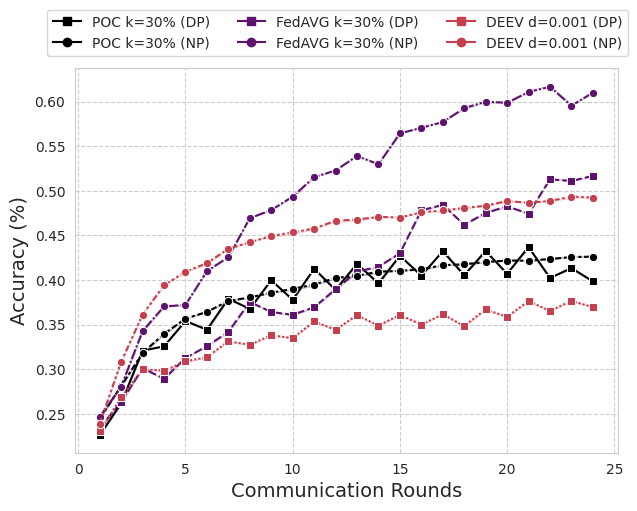

In [63]:
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(
    ax=ax,
    data=cd.loc[cd['rounds'] < 25],
    y='g_eval_acc',
    x='rounds',
    hue='config_test',
    style='config_test',
    markers=markers,
    palette=palette,
    errorbar=('ci', False),
)
ax.set_xlabel('Communication Rounds', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.grid(True)
# h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
fig.legend(handles=legends, bbox_to_anchor=(0.5,0.95), ncol=3, loc='center')
fig.savefig("literature_compare.png", dpi=500)